# DF KAGGLE WINE

## Importaciones y carga de datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests as rq

import warnings
warnings.filterwarnings('ignore')                  # para quitar warnings

from pymongo import MongoClient
from sqlalchemy import create_engine

pd.set_option('display.max_columns', None)         # muestra todas las columnas del df.head()

In [33]:
df= pd.read_csv(r'C:\Users\Oriana Ampuero\ironhack\semana4\PROJECT-3\DATA\wines_SPA.csv')

df.head(10)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209,Espana,Ribera del Duero,490.00,Ribera Del Duero Red,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Espana,Ribera del Duero,349.00,Ribera Del Duero Red,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926,Espana,Ribera del Duero,810.89,Ribera Del Duero Red,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00,Ribera Del Duero Red,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630,Espana,Ribera del Duero,315.00,Ribera Del Duero Red,5.0,3.0


## Exploración

In [5]:
# dimensiones del dataframe

dim_original= df.shape

df.shape 

(7500, 11)

In [6]:
# información del df

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 3.1 MB


In [7]:
# crear lista con nombres actuales de las columnas

name_columns= df.columns.values
name_columns

array(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country',
       'region', 'price', 'type', 'body', 'acidity'], dtype=object)

In [8]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [13]:
# eliminar filas con valores nulos y la columna 'country' porque todos nuestros vinos son de España

df['year']= df['year'].replace('N.V.', np.NaN)
df= df.dropna()

df['year']= df['year'].astype(np.int64)

In [14]:
df= df.drop(columns=['country'])
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [15]:
df= df.reset_index(drop=True)

In [31]:
# conocer la cantidad de valores nulos en las columnas

nan_cols=df.isna().sum()
nan_cols[nan_cols>0]

Series([], dtype: int64)

In [16]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6070 entries, 0 to 6069
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6070 non-null   object 
 1   wine         6070 non-null   object 
 2   year         6070 non-null   int64  
 3   rating       6070 non-null   float64
 4   num_reviews  6070 non-null   int64  
 5   region       6070 non-null   object 
 6   price        6070 non-null   float64
 7   type         6070 non-null   object 
 8   body         6070 non-null   float64
 9   acidity      6070 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 1.9 MB


In [19]:
# valores únicos en la columna 

df.region.unique()

array(['Toro', 'Vino de Espana', 'Ribera del Duero', 'Montilla-Moriles',
       'Jumilla', 'Priorato', 'Rioja', 'Bierzo', 'Castilla y Leon',
       'Campo de Borja', 'Cava', 'Jerez Palo Cortado', 'Emporda',
       'Rioja Alta', 'Somontano', 'Dominio de Valdepusa', 'Mallorca',
       'Yecla', 'Cigales', 'Utiel-Requena', 'Rioja Alavesa', 'Cadiz',
       'Costers del Segre', 'Sardon de Duero', 'Cataluna', 'Rueda',
       'Montsant', 'Conca de Barbera', 'Rias Baixas', 'Navarra',
       'Tierra del Vino de Zamora', 'Penedes', 'Dehesa del Carrizal',
       'Madrid', 'Carinena', 'Alicante', 'Almansa', 'Valencia',
       'Sierras de Malaga', 'Jerez Pedro Ximenes (PX)', 'El Terrerazo',
       'Jerez-Xeres-Sherry', 'Castilla', 'Pla de Bages',
       'Pago Calzadilla', 'Andalucia', 'Monterrei',
       'Ribera del Gallego-Cinco Villas', 'Aragon', 'Binissalem-Mallorca',
       'Calatayud', 'Pla i Llevant', 'Arinzano', 'Extremadura', 'Alella',
       'Murcia', 'La Mancha', 'Otazu', 'Mentrida', 'Ribe

## Visualizaciones del df

<AxesSubplot:xlabel='winery'>

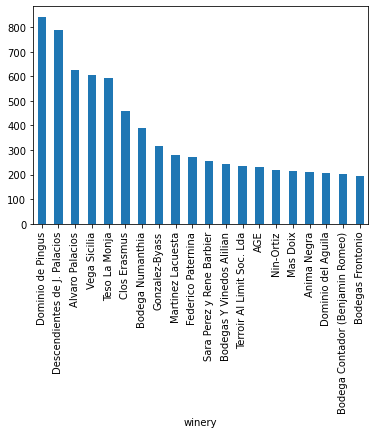

In [20]:
# TOP 20 mejores bodegas/precio medio

df.groupby('winery')['price'].mean().sort_values(ascending=False).head(20).plot.bar()

<AxesSubplot:xlabel='winery'>

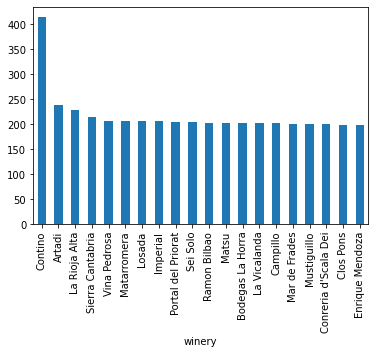

In [21]:
# TOP 20 mejores bodegas/número total de vinos

df.groupby('winery')['wine'].count().sort_values(ascending=False).head(20).plot.bar()

<AxesSubplot:xlabel='region'>

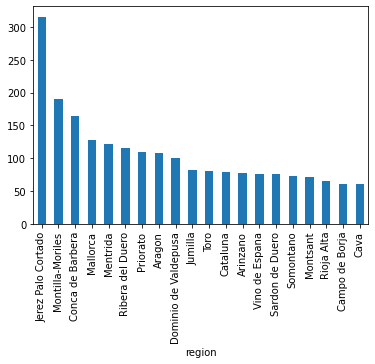

In [22]:
# TOP 20 regiones/precio promedio

df.groupby('region')['price'].mean().sort_values(ascending=False).head(20).plot.bar()

<AxesSubplot:xlabel='type'>

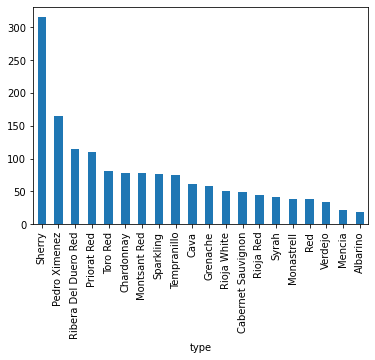

In [23]:
# TOP 20 tipos de vino/precio medio

df.groupby('type')['price'].mean().sort_values(ascending=False).head(20).plot.bar()

<AxesSubplot:xlabel='rating', ylabel='price'>

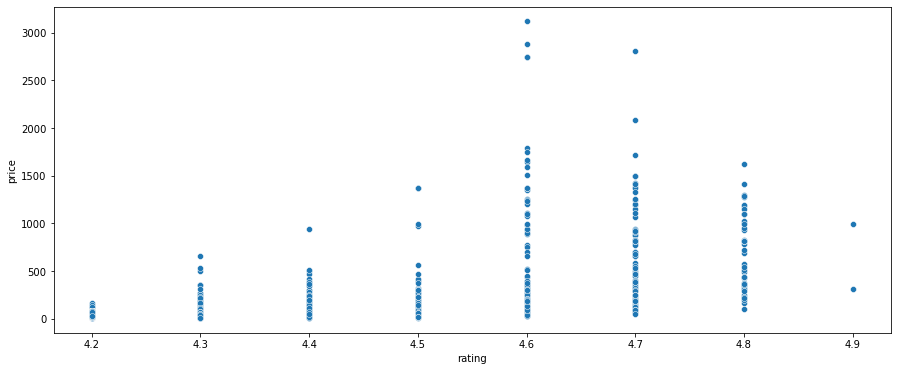

In [24]:
# Relación rating/precio del vino

plt.figure(figsize=(15,6))
sns.scatterplot(data = df, x= 'rating', y ='price')

Podemos observar que el precio es alto en vinos con calificación de 4.6 y los vinos con calificación de 4.9 tienen un precio mejor.

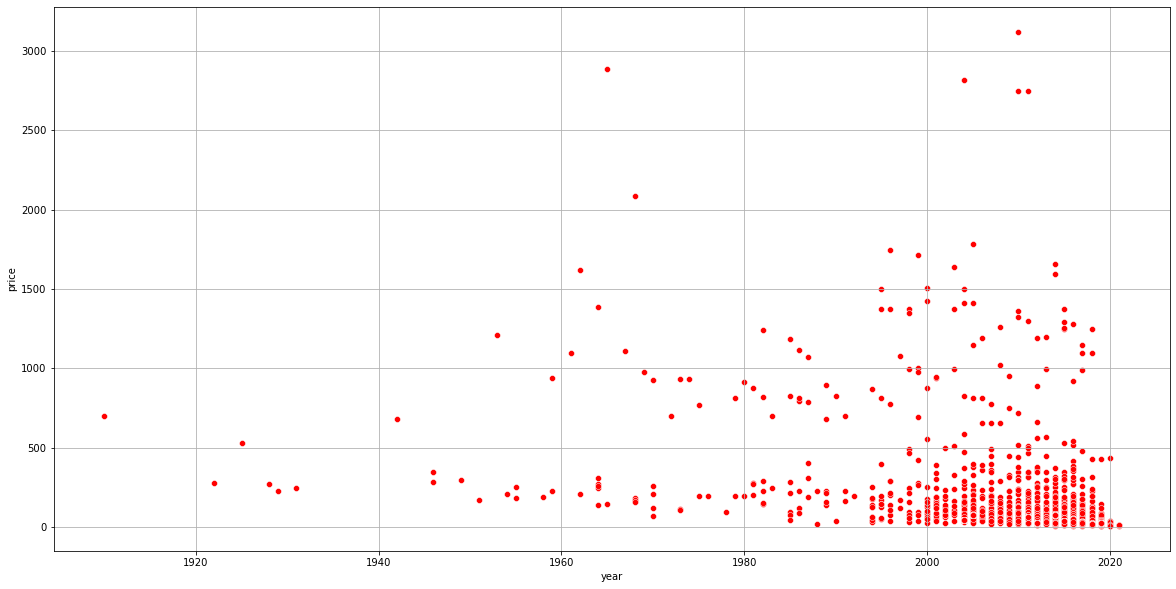

In [26]:
# Relación precio del vino/ año que se recolectó la uva

plt.figure(figsize = (20,10))
sns.scatterplot(data = df, y='price', x='year', color='red')
plt.grid()

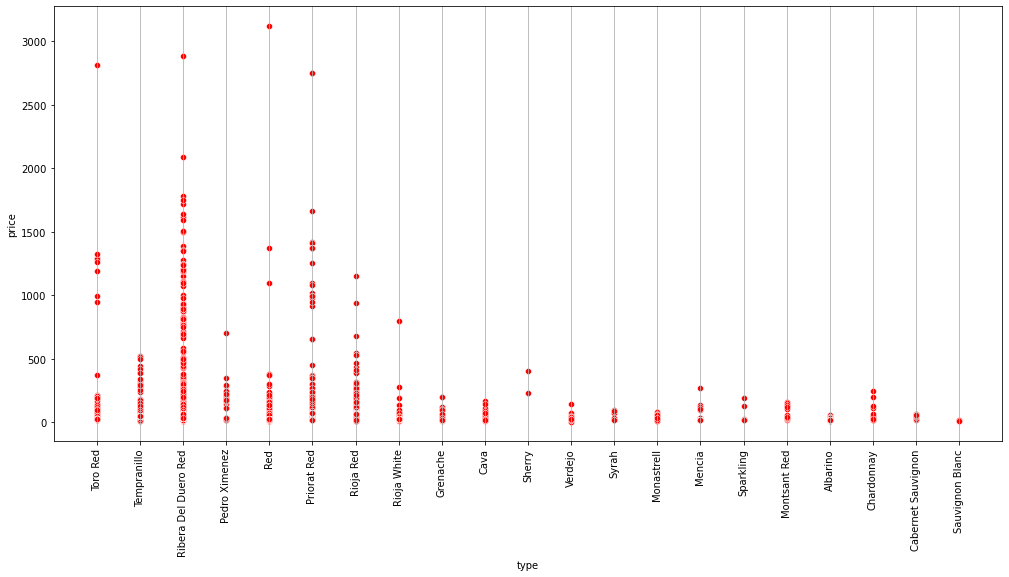

In [29]:
# Relación tipo de vino/ precio

plt.figure(figsize=(17,8))
sns.scatterplot(data = df, y='price', x='type', color='red')
plt.grid(axis='x')
plt.xticks(rotation=90);

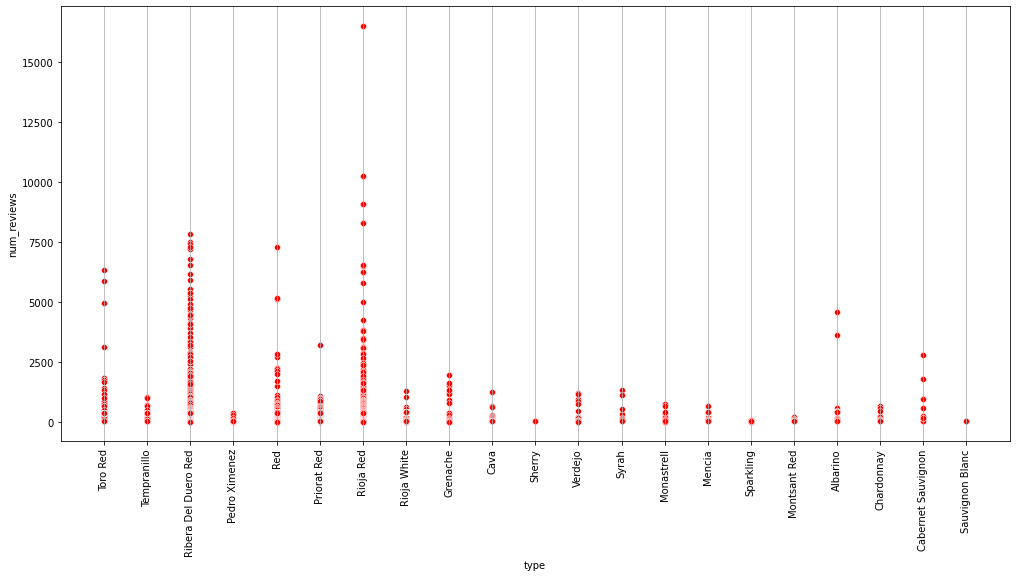

In [30]:
# Relación tipo de vino/ usuarios que opinaron del vino

plt.figure(figsize=(17,8))
sns.scatterplot(data = df, y='num_reviews', x='type', color='red')
plt.grid(axis = 'x')
plt.xticks(rotation=90);

Aquí podemos ver que el tipo de vino Tinto es el más popular y sobrevalorado, en cambio el Tempranillo está más subestimado.